In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dataset = pd.read_csv('~/Downloads/Admission_Predict.csv')

In [25]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
dataset['Admission'] = [round(i) if i >= 0.7 else 0 for i in dataset['Chance of Admit ']]

In [28]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [29]:
X = dataset.drop(['Admission', 'Chance of Admit '],axis=1)
y = dataset['Admission']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [31]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

m = model.coef_[0][0]
c = model.intercept_[0]

[[ 0.00455057 -0.0641177   0.0367958   0.97224406  0.10507663  0.27474175
   1.41646581  1.47058224]]
[-0.93364342]


/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [32]:
y_pred = model.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[13,  3],
       [ 4, 20]])

Text(51.0, 0.5, 'y prediksi')

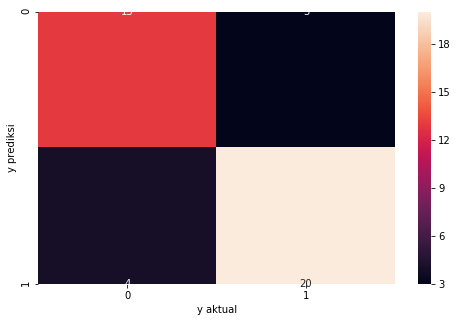

In [34]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',ax=ax)
plt.xlabel('y aktual')
plt.ylabel('y prediksi')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.87      0.83      0.85        24

    accuracy                           0.82        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.83      0.82      0.83        40

